In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
json_path = '/content/drive/MyDrive/Colab_Notebooks/instances_val2017.json/instances_val2017.json'
images_dir = '/content/drive/MyDrive/Colab_Notebooks/val2017'

In [ ]:
import os
import math
import random
import json, cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import matplotlib.patches as patches
import sklearn.metrics as met
from PIL import Image, ImageDraw
from skimage import data, color, draw
from skimage.transform import resize
from skimage.segmentation import active_contour


In [ ]:
def load_coco_annotations(json_path):
  with open(json_path, "r") as f:
    data = json.load(f)
  return data

In [ ]:
# Display the image
def display_image(image_path, annotations):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis("off")
  draw = ImageDraw.Draw(image)
  plt.show()

In [ ]:
# Loaded the annotations file from COCO
annotation_json_file= '/content/drive/MyDrive/Colab_Notebooks/instances_val2017.json/instances_val2017.json'
coco_annotations = load_coco_annotations(annotation_json_file)

In [ ]:
# Get all the available image IDs
all_image_ids = [img['id'] for img in coco_annotations['images']]

In [ ]:
# Select 3 random image IDs
num_images_to_display = 3
selected_image_ids = np.random.choice(all_image_ids, num_images_to_display, replace=False)

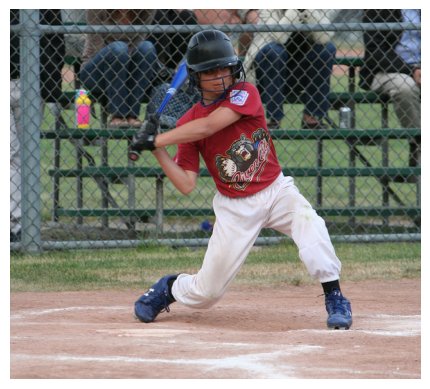

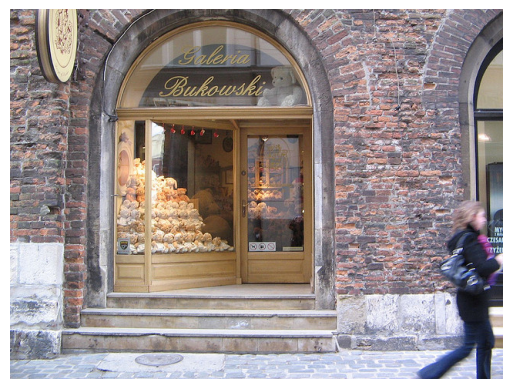

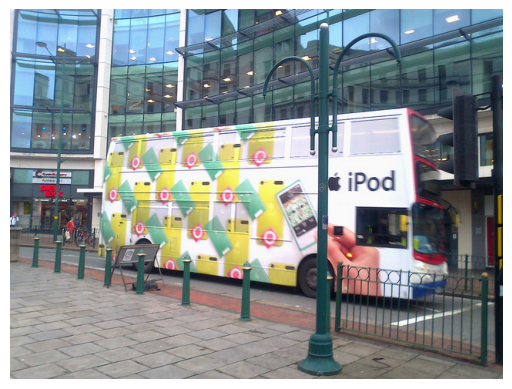

In [ ]:
# Initialize lists for paths and annotations
image_paths = []
annotations_list = []

# Loop through selected image IDs to display each one
for image_id in selected_image_ids:
    # Retrieve image information
    image_info = next(img for img in coco_annotations['images'] if img['id'] == image_id)
    image_path = '/content/drive/MyDrive/Colab_Notebooks/val2017/' + image_info['file_name']

    # Add image path to list
    image_paths.append(image_path)

    # Retrieve annotations for the current image
    annotations = [anno for anno in coco_annotations['annotations'] if anno['image_id'] == image_id]
    annotations_list.append(annotations)

    # Display image with annotations
    display_image(image_path, annotations)

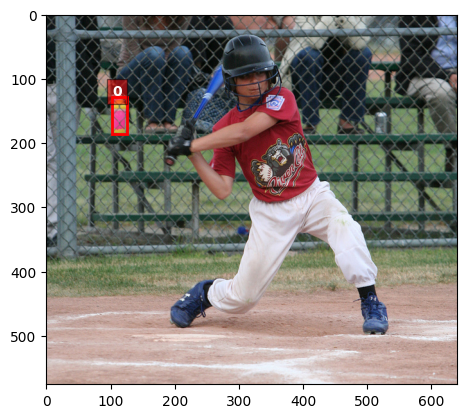

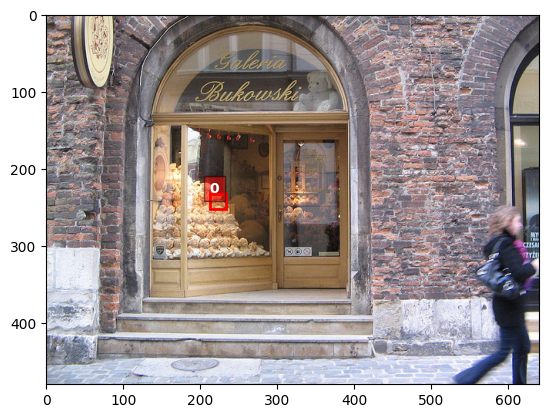

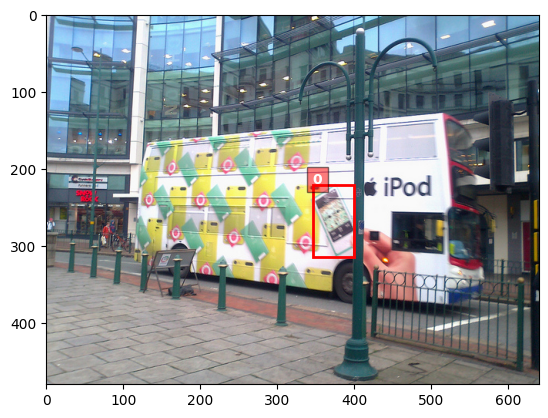

In [ ]:
# Display image bounding boxes from annotations
bounding_boxes = list()

for i in range(len(image_paths)):
  image_path = image_paths[i]
  bboxes = list()

  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  fig, ax = plt.subplots(1)
  ax.imshow(img)

  for item in annotations_list[i]:
    bboxes.append(item['bbox'])

    bounding_boxes.append(bboxes)

    for i, bbox in enumerate(bboxes):
      rectangle = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth = 2, edgecolor = 'r', facecolor = 'none')
      ax.add_patch(rectangle)
      ax.text(bbox[0], bbox[1]-2, str(i), color = 'w', fontsize = 10, fontweight='bold', bbox=dict(facecolor='red', alpha=0.5))
    plt.show()